## K-Means Hands-On Task

The goal of this task is to get you aquainted with the K-Means clustering algorithm. For this, we generate a dataset consisting of several blobs. To emphasize that this is an unsupervised algorithm, we will show in the visualization all blobs in the same colour. 

TASK: Press CTRL-Enter in the cell below to execute the code and to see the plot.  

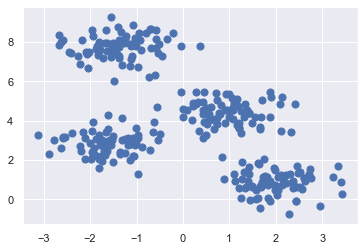

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

We now apply the K-Means algorithm with some predefined hyperparameters and k=4. It uses random initial centroids.

TASK: Run the code several times. Do the clusters change?

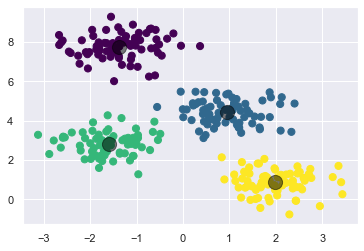

In [51]:
ncenters = 4
kmeans = KMeans(n_clusters=ncenters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

To see the effect of the initial centroids, we can define their position explicitely and pass them to k-means. 
This is the clustering that we obtain if we set all initial centroids to zeroes. 

TASK: adapt the code to use different initial centroids, e.g. (0,0), (1,1), (1,3) and (2,6) 

TASK: adapt the code to show the initial centroids in the plot

TASK: Try different types of initializations (see http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). In which cases does the algorithm fail?

In [92]:
ncenters = 4
init_centers = np.array([[-1,0], [-2,0], [3,0], [-3,0]])
#kmeans = KMeans(n_clusters=ncenters, init=np.zeros(shape=(ncenters,2)), random_state=0)

# fails if you raise the tolerance or lower the max iterations
kmeans = KMeans(n_clusters=ncenters, init=init_centers, random_state=0, max_iter=300, tol=0.0001)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


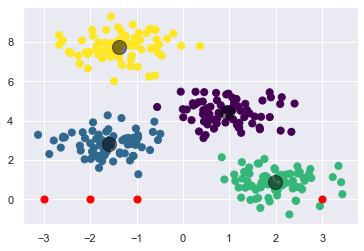

In [93]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# initial centers
plt.scatter(init_centers[:, 0], init_centers[:, 1], c='red', s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    

Until now we pre-defined the "correct" number of clusters k=4. 

TASK: what happens if you use other values of k, e.g. k=1, 2, 3, 10?

TASK: extend the code to run k-means for different values of k, and plot the Sum of Squared Errors (SSE) for each value in a chart. Where is the "elbow"? Does it correspond with the proper number of clusters? 

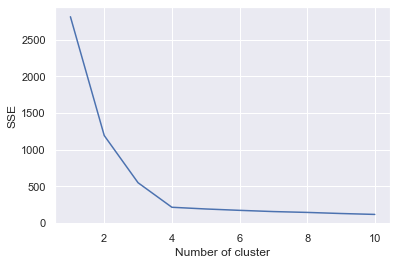

In [107]:
# k = 1..10
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=0)
    kmeans.fit(X)
    
    # calculate sse 
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# elbow is at 4 --> corresponds with the number of clusters

## GMM Hands-On Task

### Version 1
Now let us apply the Gaussian Mixture Models on the same data. 

TASK: Run the GMM algorithm. Does the result match your expectation? If not, why? What do you have to change to make it work?



In [142]:
from sklearn.mixture import GaussianMixture
ncenters = 4
gmm = GaussianMixture(n_components=ncenters, means_init=None, random_state=0)
gmm.fit(X)
y_gmm_means = gmm.predict(X)

# changed means init to None --> means are initialized randomally

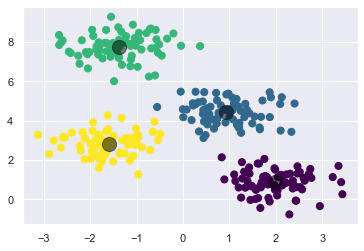

In [143]:
plt.scatter(X[:, 0], X[:, 1], c=y_gmm_means, s=50, cmap='viridis')
centers = gmm.means_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Can you seperate the Moons?

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. The same applies for GMMs. 

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach.


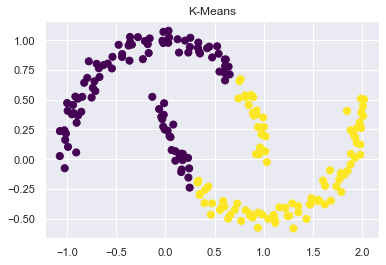

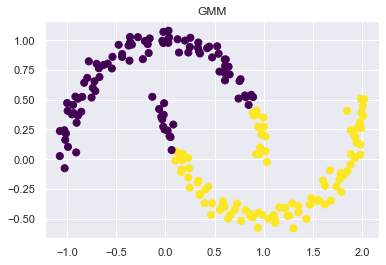

In [144]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

X_moon, y_moon = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X_moon)
plt.figure(0)
plt.clf()
plt.title('K-Means')
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=labels, s=50, cmap='viridis');

gmm = GaussianMixture(2, random_state=0)
gmm.fit(X_moon)
labels_gmm = gmm.predict(X_moon)
plt.figure(1)
plt.clf()
plt.title('GMM')
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=labels_gmm, s=50, cmap='viridis');



One solution is to transform the data into a higher dimension where linear seperation is possible (more on this during the SVM lecture). 

One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

TASK: run SpectralClustering with 2 clusters, nearest_neighbors strategy and label-assignment k-means, and plot the resulting clusters. 

Consult the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


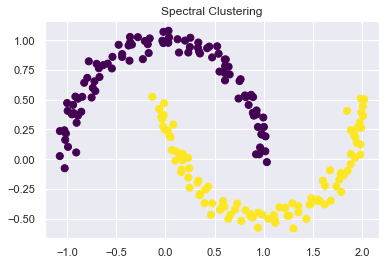

In [153]:

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

plt.figure(2)
plt.clf()
plt.title('Spectral Clustering')
labels = model.fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=labels, s=50, cmap='viridis');